# 릿지 회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


In [3]:
bt = load_boston()

x_train , x_test, y_train, y_test = train_test_split(bt.data, bt.target,test_size = 0.3, random_state=12)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [29]:
# 규제를 위한 alpha 값 초기화
# alpha 값을 통해 penalty 값 조절 가능 
alpha = 0.1

In [30]:
ridge = Ridge(alpha = alpha)

In [31]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [32]:
result = ridge.predict(x_test)

In [33]:
r2_test = ridge.score(x_test, y_test)
r2_train = ridge.score(x_train, y_train)
print('r2_test:{0:.3f}', format(r2_test))
print('r2_train:{0:.3f}', format(r2_train))
# 회귀 모델이 주어진 자료에 얼마나 적합한 자료인지 보여주는 척도.


r2_test:{0:.3f} 0.708329348002711
r2_train:{0:.3f} 0.7482023220066704


In [34]:
# 각 컬럼별 회귀 변수  값.
coef_table = pd.Series(data=np.round(ridge.coef_,1),index=bt.feature_names)
print("내림차순 장렬", coef_table.sort_values(ascending=False))

내림차순 장렬 RM          3.6
CHAS        3.3
RAD         0.3
ZN          0.1
INDUS       0.1
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.8
DIS        -1.3
NOX       -15.7
dtype: float64


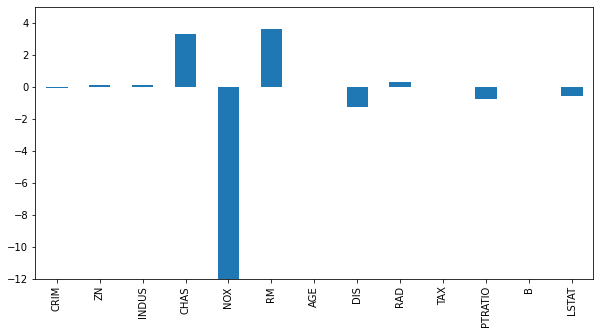

In [35]:
# 시각화
plt.figure(figsize=(10,5))
coef_table.plot(kind='bar')
plt.ylim(-12,5)
plt.show()


# 이때 알파값이 증가할 수록 1에 가까워지고
# 패널티를 조절하고 과대적합을 줄이면서
# 일반성을 가지는 모델을 생성 할 수 있게 된다! -> 릿지 규제 기법 사용 